## This is the overall data in the CAERS_ASCII_2004_2017Q2.csv file

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import scipy.stats as stats


In [7]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Resources/CAERS_ASCII_2004_2017Q2.csv")

In [8]:
df.columns

Index(['RA_Report #', 'RA_CAERS Created Date', 'AEC_Event Start Date',
       'PRI_Product Role', 'PRI_Reported Brand/Product Name',
       'PRI_FDA Industry Code', 'PRI_FDA Industry Name',
       'CI_Age at Adverse Event', 'CI_Age Unit', 'CI_Gender',
       'AEC_One Row Outcomes', 'SYM_One Row Coded Symptoms'],
      dtype='object')

In [9]:
# Rename the column names
df.rename(columns={'RA_Report #': 'ReportNo', 'RA_CAERS Created Date': 'CreatedDate', 'AEC_Event Start Date': 'EventDate', 
                   'PRI_Product Role': 'ProductRole', 'PRI_Reported Brand/Product Name': 'ReportedProducts', 
                   'PRI_FDA Industry Code': 'FDAIndustryCode', 'PRI_FDA Industry Name': 'FDAIndustryName', 
                   'CI_Age at Adverse Event': 'AgeNo', 'CI_Age Unit': 'AgeUnit', 'CI_Gender': 'Gender', 
                   'AEC_One Row Outcomes': 'Outcmes', 'SYM_One Row Coded Symptoms': 'Symptoms'}, inplace=True)

df.head()

,ReportNo,CreatedDate,EventDate,ProductRole,ReportedProducts,FDAIndustryCode,FDAIndustryName,AgeNo,AgeUnit,Gender,Outcmes,Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [10]:
 # Populate the year of created date into a new column
df['CreatedYear'] = pd.DatetimeIndex(df['CreatedDate']).year

In [79]:
# Check all the column counts
df.count()

ReportNo            90786
CreatedDate         90786
EventDate           53653
ProductRole         90786
ReportedProducts    90786
FDAIndustryCode     90786
FDAIndustryName     90786
AgeNo               52926
AgeUnit             90786
Gender              90786
Outcmes             90786
Symptoms            90781
dtype: int64

In [11]:
# List the number of reported incidents by year
incids_by_year = pd.DataFrame(df.groupby('CreatedYear')['ReportNo'].count())
incids_by_year

,ReportNo
CreatedYear,
2004,3338
2005,2500
2006,2194
2007,3152
2008,4116
2009,5768
2010,4949
2011,6711
2012,7757


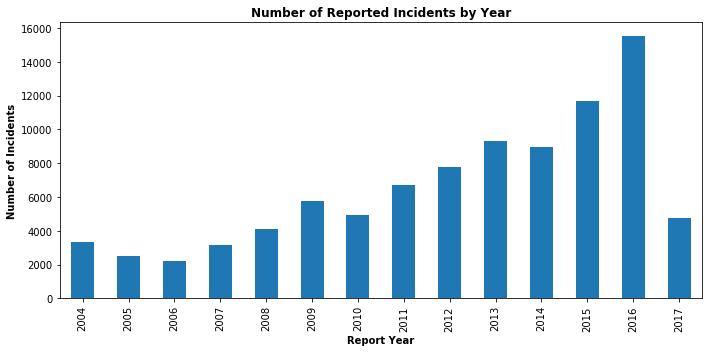

In [12]:
incids_by_yr_chart = incids_by_year.plot(kind='bar', legend=False, figsize=(10,5))
incids_by_yr_chart.set_title('Number of Reported Incidents by Year', fontweight='bold')
incids_by_yr_chart.set_xlabel('Report Year', fontweight='bold')
incids_by_yr_chart.set_ylabel('Number of Incidents', fontweight='bold')

plt.tight_layout()
plt.show

### Reported incident numbers per gender

#### Overall reported incedent numbers by gender

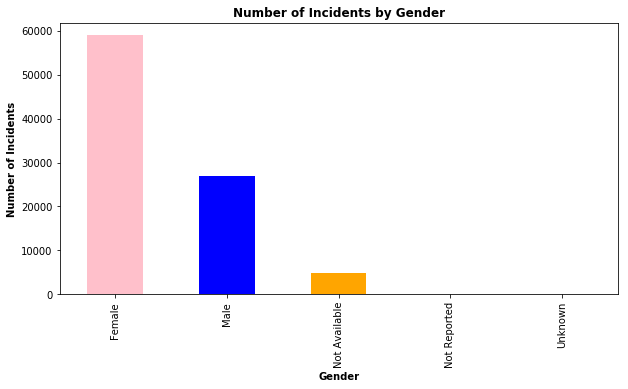

<Figure size 432x288 with 0 Axes>

In [23]:
# Count overall incidents by gender
group_by_gender = df.groupby('Gender')
incids_by_gender = group_by_gender['Gender'].count()

incids_by_gender_chart = incids_by_gender.plot(kind='bar', color=['pink', 'blue', 'orange', 'green', 'red'], figsize=(10,5))
incids_by_gender_chart.set_title("Number of Incidents by Gender", fontweight='bold')
incids_by_gender_chart.set_xlabel('Gender', fontweight='bold')
incids_by_gender_chart.set_ylabel('Number of Incidents', fontweight='bold')
plt.show()
plt.tight_layout()

In [24]:
incids_by_gender

Gender
Female           58924
Male             26943
Not Available     4916
Not Reported         1
Unknown              2
Name: Gender, dtype: int64

#### Incident numbers by year and gender

In [29]:
incids_by_male = df.loc[df['Gender']=='Male']['CreatedYear'].value_counts().sort_values()
incids_by_female = df.loc[df['Gender']=='Female']['CreatedYear'].value_counts().sort_values()
incids_by_yr_gender = pd.DataFrame({'Male': incids_by_male, 'Female': incids_by_female})
incids_by_yr_gender

,Male,Female
2004,1022,1976
2005,848,1439
2006,830,1265
2007,1160,1812
2008,1255,2651
2009,2183,3342
2010,1853,2875
2011,2217,4125
2012,2468,4675
2013,2775,6015


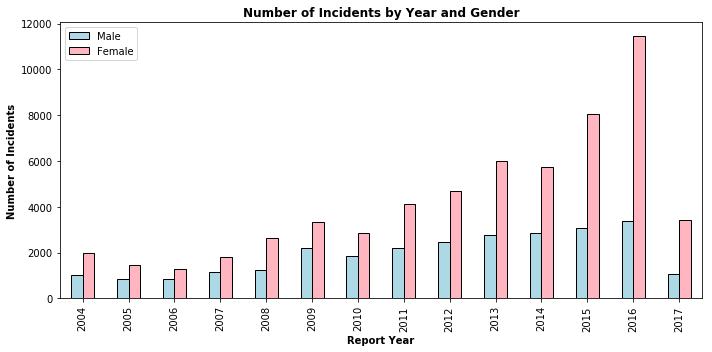

In [34]:
incids_by_yr_gender_chart = incids_by_yr_gender.plot(kind='bar', color=['lightblue','lightpink'], edgecolor='black', figsize=(10,5))
incids_by_yr_gender_chart.set_title("Number of Incidents by Year and Gender", fontweight='bold')
incids_by_yr_gender_chart.set_xlabel("Report Year", fontweight='bold')
incids_by_yr_gender_chart.set_ylabel("Number of Incidents", fontweight='bold')
incids_by_yr_gender_chart.legend(fancybox=True, loc="best")
plt.tight_layout()
#plt.savefig("Image/total_incidents_gender.png")
plt.show()


### The number of incidents per product

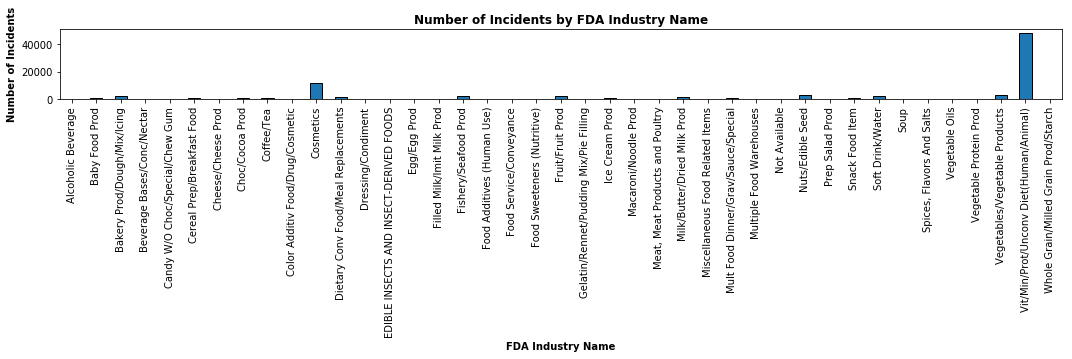

In [18]:
incids_by_Product = pd.DataFrame(df.groupby(['FDAIndustryName'])['ReportNo'].count())

incids_by_product_chart = incids_by_Product.plot(kind='bar', legend=False, edgecolor='black', figsize=(15,5))
incids_by_product_chart.set_title("Number of Incidents by FDA Industry Name", fontweight='bold')
incids_by_product_chart.set_xlabel("FDA Industry Name", fontweight='bold')
incids_by_product_chart.set_ylabel("Number of Incidents", fontweight='bold')

plt.tight_layout()
#plt.savefig("Image/FDA_total_incidents.png")
plt.show()
